Load data

In [2]:
import pandas as pd
import numpy as np
train_features = pd.read_csv('dataset/train_features.csv')
test_features = pd.read_csv('dataset/test_features.csv')
train_features
train_features = train_features.drop('Unnamed: 0', axis=1)
train_features = np.array(train_features)
test_features
test_features = test_features.drop('Unnamed: 0', axis=1)
test_features = np.array(test_features)

In [3]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = float(line[0])
            labels.append(t)
            sentences.append(line[1:].strip())
    return labels, sentences


In [4]:
train_labels, train_data = read_data('dataset/train.txt')
test_labels, test_data = read_data('dataset/test.txt')

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [5]:
train_features.shape

(70, 4)

Visualizing dataset

In [6]:
import matplotlib.pyplot as plt
def plete(l,m,p):
    x_coords_class0 = []
    y_coords_class0 = []
    x_coords_class1 = []
    y_coords_class1 = []

    for i in  range(len(test_labels)):
        if(test_labels[i]==0):
            x_coords_class0.append(test_features[i, l])
            y_coords_class0.append(test_features[i, m])
        elif(test_labels[i]==1):
            x_coords_class1.append(test_features[i, l])
            y_coords_class1.append(test_features[i, m])


    # Create the plot
    plt.scatter(x_coords_class0, y_coords_class0, color='blue', marker='o', label="class 0 test set")
    plt.scatter(x_coords_class1, y_coords_class1, color='red', marker='o',label="class 1 test set")
    # Add labels and title
    plt.xlabel('Pauli'+p+' value for first Qubit')
    plt.ylabel('Pauli '+p+' value for second Qubit')
    plt.title('2D Coordinate Plot for '+p+' values of Test set')
    plt.legend()
    # Show grid
    plt.grid(True)
    plt.xlim(-1.0, 1.0)
    plt.ylim(-1.0, 1.0)
    # Display the plot
    plt.show()

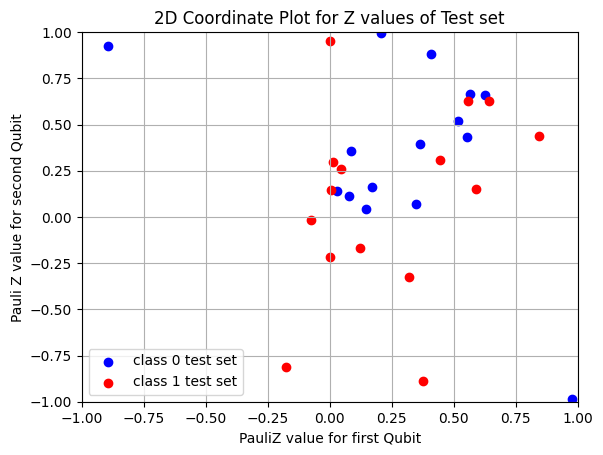

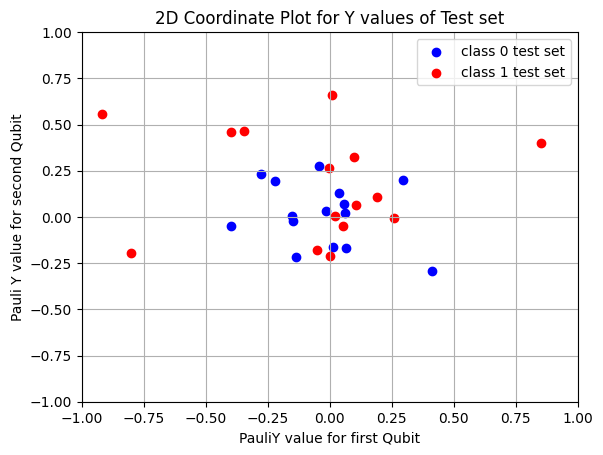

In [7]:
plete(0,2,'Z')
plete(1,3,'Y')

Quantum SVM using zzfeaturemap

In [8]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
import matplotlib as plt
from qiskit_machine_learning.algorithms import QSVC

feature_map = ZZFeatureMap(feature_dimension=6, reps=4, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.6666666666666666


Quantum SVM using PauliFeatureMap

In [9]:
from qiskit.circuit.library import PauliFeatureMap
feature_map = PauliFeatureMap(feature_dimension=2, reps=4, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.6666666666666666


Custom Feature Map 1

In [10]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.circuit import Parameter
theta1 = Parameter('θ1')
phi1 = Parameter('φ1')
theta2 = Parameter('θ2')
phi2 = Parameter('φ2')


qc = QuantumCircuit(4)

qc.h(0)
qc.h(1)


for i in range(3):
    qc.rz(theta1, 0)
    qc.ry(phi1, 0)


    qc.rz(theta2, 1)    
    qc.ry(phi2, 1)
qc.cx(0,2)
qc.cx(1,3)


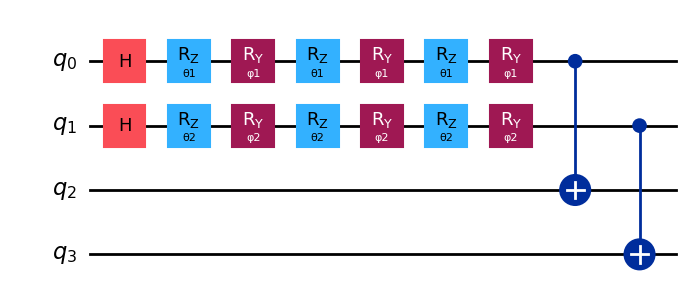

In [11]:
qc.draw('mpl')

In [12]:
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=qc)

qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.6666666666666666


Custom Feature Map 2

In [13]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

for i in range(3):
    qc.rz(theta1, 0)
    qc.ry(phi1, 0)

    qc.rz(theta2, 1)    
    qc.ry(phi2, 1)
    
    
qc.t(1)
qc.append(QFT(2, do_swaps=False).to_gate(), range(2))

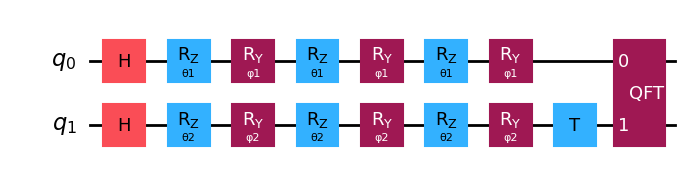

In [15]:
qc.draw('mpl')

In [16]:
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=qc)

qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.6666666666666666
